# Trabajo Practico: Bagging

## Imports iniciales:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from preprocesamiento import feature_engineering
from preprocesamiento import obtenerDFTraining
from preprocesamiento import preprocesar_data_frame
from preprocesamiento import prepros_dummies

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
RANDOM_STATE = 19 * 103785

## Bagging

Bagging es un ensamble que se basa en dividir un datset en varios subset's y luego construir un unico modelo predictivo a partir  de los anteriores, con votaciones. De esta forma disminuimos la varianza en nuestro modelo final y el overfitting.

In [2]:
from preprocesamiento import metricas
from preprocesamiento import preprocesar_df_pca
from preprocesamiento import preprocesar_normalize_scaler
from sklearn.preprocessing import Normalizer

In [3]:
df = obtenerDFTraining()
X, y = preprocesar_data_frame(df)
X = preprocesar_normalize_scaler(X)
X = preprocesar_df_pca(X, 30)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

Para este modelo decidimos utilizar PCA y normalize scaler para el preprocesamiento y arboles profundos como estimador.

In [6]:
parametros = {'n_estimators' : [50,100,1000,2000], 'base_estimator' : 
              [tree.DecisionTreeClassifier(criterion='entropy', max_depth = 11),
              tree.DecisionTreeClassifier(criterion='entropy', max_depth = 12),
              tree.DecisionTreeClassifier(criterion='gini', max_depth = 11),
              tree.DecisionTreeClassifier(criterion='gini', max_depth = 12)],
              'random_state':[RANDOM_STATE]}
               
bagging = BaggingClassifier()
clf_bagging = GridSearchCV(bagging, parametros,n_jobs =-1,verbose = 4, scoring = 'roc_auc')

clf_bagging.fit(x_train, y_train)

print(classification_report(y_test,clf_bagging.predict(x_test)))
clf_bagging.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 62.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 256.8min finished


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6196
           1       0.73      0.58      0.65      1936

    accuracy                           0.85      8132
   macro avg       0.80      0.76      0.78      8132
weighted avg       0.84      0.85      0.84      8132



{'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=12),
 'n_estimators': 2000,
 'random_state': 1971915}

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6196
           1       0.73      0.58      0.65      1936

    accuracy                           0.85      8132
   macro avg       0.80      0.76      0.78      8132
weighted avg       0.84      0.85      0.84      8132



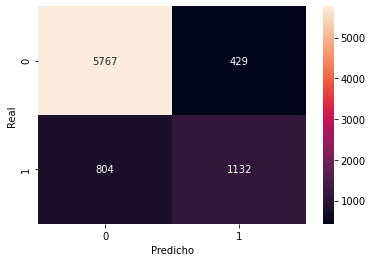

Recall: 0.58
Precision: 0.73
Acc: 0.85
Roc: 0.9


In [8]:
clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy', max_depth = 12),
                        n_estimators=2000, verbose=0, n_jobs=-1,random_state=RANDOM_STATE) 

clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))
metricas(y_test,clf.predict(x_test),x_test,clf)

## Otro preprocesamiento: Seleccionando variables y normalizando

In [3]:
df = obtenerDFTraining()
X, y = preprocesar_data_frame(df)
X_prepos = prepros_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
X_prepos = preprocesar_normalize_scaler(X_prepos)

x_train, x_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

In [4]:
parametros_pca = {'n_estimators' : [50,100,1000,2000], 'base_estimator' : 
              [tree.DecisionTreeClassifier(criterion='entropy', max_depth = 11),
              tree.DecisionTreeClassifier(criterion='entropy', max_depth = 12),
               tree.DecisionTreeClassifier(criterion='entropy', max_depth = 13),
              tree.DecisionTreeClassifier(criterion='gini', max_depth = 11),
              tree.DecisionTreeClassifier(criterion='gini', max_depth = 12),
              tree.DecisionTreeClassifier(criterion='gini', max_depth = 13)],
              'random_state':[RANDOM_STATE]}
               
bagging = BaggingClassifier()
clf_bagging_pca = GridSearchCV(bagging, parametros_pca,n_jobs =-1,verbose = 4, scoring = 'roc_auc')

clf_bagging_pca.fit(x_train, y_train)

print(classification_report(y_test,clf_bagging_pca.predict(x_test)))
clf_bagging_pca.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 65.1min finished


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6196
           1       0.75      0.58      0.65      1936

    accuracy                           0.85      8132
   macro avg       0.81      0.76      0.78      8132
weighted avg       0.85      0.85      0.85      8132



{'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=13),
 'n_estimators': 2000,
 'random_state': 1971915}

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6196
           1       0.75      0.58      0.65      1936

    accuracy                           0.85      8132
   macro avg       0.81      0.76      0.78      8132
weighted avg       0.85      0.85      0.85      8132



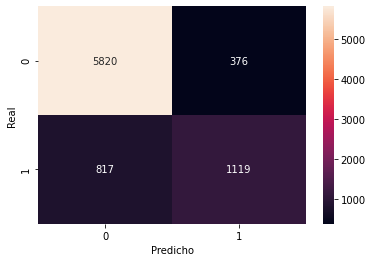

Recall: 0.58
Precision: 0.75
Acc: 0.85
Roc: 0.91


In [7]:
clf_bagging_normalize = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy', max_depth = 13),
                        n_estimators=2000, verbose=0, n_jobs=-1,random_state=RANDOM_STATE) 

clf_bagging_normalize.fit(x_train,y_train)
print(classification_report(y_test,clf_bagging_normalize.predict(x_test)))
metricas(y_test,clf_bagging_normalize.predict(x_test),x_test,clf_bagging_normalize)

## Prediccion sobre el Holdout

In [8]:
from preprocesamiento import obtenerDFHoldout
from preprocesamiento import escribir_predicciones_a_archivo

holdout = obtenerDFHoldout()
holdout.drop(columns=['representatividad_poblacional'], inplace=True)

ids = np.array(holdout['id'])
holdout = prepros_dummies(holdout[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
holdout = preprocesar_normalize_scaler(holdout)

predicciones_holdout = clf_bagging_normalize.predict(holdout)
escribir_predicciones_a_archivo(predicciones_holdout,"Bagging",ids)